Load the dataset:

In [56]:
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data
X = covertype.data.features
y = covertype.data.targets

In [72]:
### metadata
#print(covertype.metadata)

### variable information
#print(covertype.variables)

print(X.shape)
print(y.shape)

#print(X[0])
print(y.Cover_Type.value_counts())

(581012, 54)
(581012, 1)
Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [90]:
from sklearn.model_selection import train_test_split

# Sélectionner seulement une partie de la base de données au hasard
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.01, stratify=y, random_state=42)

In [92]:
print(X_sample.shape)

(5810, 54)


In [95]:
from sklearn.preprocessing import StandardScaler

### Standardiser données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [96]:
### Algorithme UMAP
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_scaled)
embedding.shape

### version paramétrique
# embedder = ParametricUMAP()
# embedding = embedder.fit_transform(X)

C:\Users\helen\source\repos_git\TP2-Apprentissage_automatique\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\helen\source\repos_git\TP2-Apprentissage_automatique\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited at iteration 730 with accuracies 
[1.42828459e-14 3.83500662e-06 1.01256482e-06 1.46230883e-06]
not reaching the requested tolerance 1.519918441772461e-06.
Use iteration 730 instead with accuracy 
1.5774700719030905e-06.

  _, diffusion_map = lobpcg(
C:\Users\helen\source\repos_git\TP2-Apprentissage_automatique\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[3.51920132e-15 3.83500865e-06 1.01255763e-06 1.46230850e-06]
not reaching the requested tolerance 1.519918441772461e-06.
  _, diffusion_map = lobpcg(


KeyboardInterrupt: 

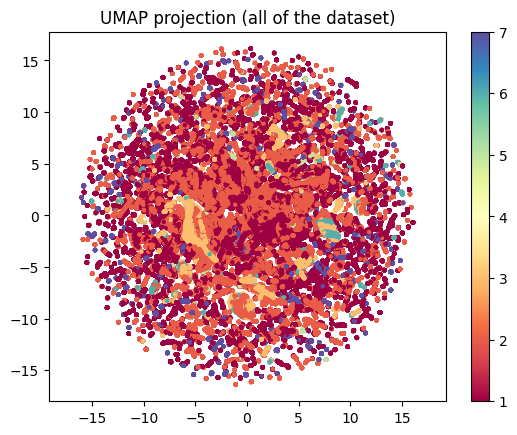

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.scatter(embedding[:, 0], embedding[:, 1], c=y.Cover_Type, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(7))
plt.title('UMAP projection');